# ASQUIRE DATA LOADING

In [76]:
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
import IPython.display as ipd
from scipy import signal
import soundfile as sf
import pandas as pd
import numpy as np
import subprocess
import functools
import librosa
import shutil
import glob
import json
import os

from lib.asqlib import *

## DATA PATHS

In [77]:
EXP_VER = "v12"
REPORT_FOLDER = f"report_{EXP_VER}"

ASQ_MUSTER_CSV = f"{REPORT_FOLDER}/asquire_corpus_muster.csv"
ASQ_LABELS_CSV = f"{REPORT_FOLDER}/all_asq_aud_anotes.csv"

In [78]:
pd.read_csv(ASQ_MUSTER_CSV)

index                sub_id age gender height weight  \
0        0         qwer-0177a438   -      -      -      -   
1        1    bugsbunny-13f848d8   -      -      -      -   
2        2         doll-808ed97a   -      -      -      -   
3        3        varun-8f78ac35   -      -      -      -   
4        4  murugeswari-d700dff3   -      -      -      -   
..     ...                   ...  ..    ...    ...    ...   
227    227       harisk-6f82d610  58      m    175     88   
228    228       arhaam-350fc3e6   6      m    114     30   
229    229       ravisk-cd186836  60      m    177     83   
230    230     srinivas-b89febe6  60      m    172     85   
231    231    cooldudeo-060466fb  16      o    132    102   

                                  meta-data--file_path  \
0                                                    -   
1                                                    -   
2                                                    -   
3                                                    -   
4                                                    -   
..                                                 ...   
227  report_v12/asquire_data/harisk-6f82d610/webapp...   
228  report_v12/asquire_data/arhaam-350fc3e6/webapp...   
229  report_v12/asquire_data/ravisk-cd186836/webapp...   
230  report_v12/asquire_data/srinivas-b89febe6/weba...   
231  report_v12/asquire_data/cooldudeo-060466fb/web...   

                            anot--meta-data--file_path  \
0                                                    -   
1                                                    -   
2                                                    -   
3                                                    -   
4                                                    -   
..                                                 ...   
227  report_v12/asquire_data/harisk-6f82d610/webapp...   
228  report_v12/asquire_data/arhaam-350fc3e6/webapp...   
229  report_v12/asquire_data/ravisk-cd186836/webapp...   
230  report_v12/asquire_data/srinivas-b89febe6/weba...   
231  report_v12/asquire_data/cooldudeo-060466fb/web...   

                                     breath--file_path  \
0                                                    -   
1    report_v12/asquire_data/bugsbunny-13f848d8/web...   
2    report_v12/asquire_data/doll-808ed97a/webapp-a...   
3    report_v12/asquire_data/varun-8f78ac35/webapp-...   
4    report_v12/asquire_data/murugeswari-d700dff3/w...   
..                                                 ...   
227  report_v12/asquire_data/harisk-6f82d610/webapp...   
228  report_v12/asquire_data/arhaam-350fc3e6/webapp...   
229  report_v12/asquire_data/ravisk-cd186836/webapp...   
230  report_v12/asquire_data/srinivas-b89febe6/weba...   
231  report_v12/asquire_data/cooldudeo-060466fb/web...   

                               anot--breath--file_path  ...  \
0                                                    -  ...   
1                                                    -  ...   
2                                                    -  ...   
3                                                    -  ...   
4                                                    -  ...   
..                                                 ...  ...   
227  report_v12/asquire_data/harisk-6f82d610/webapp...  ...   
228  report_v12/asquire_data/arhaam-350fc3e6/webapp...  ...   
229  report_v12/asquire_data/ravisk-cd186836/webapp...  ...   
230  report_v12/asquire_data/srinivas-b89febe6/weba...  ...   
231  report_v12/asquire_data/cooldudeo-060466fb/web...  ...   

                                         uu--file_path  \
0                                                    -   
1    report_v12/asquire_data/bugsbunny-13f848d8/web...   
2    report_v12/asquire_data/doll-808ed97a/webapp-a...   
3    report_v12/asquire_data/varun-8f78ac35/webapp-...   
4    report_v12/asquire_data/murugeswari-d700dff3/w...   
..                                                 ...   
227  report_v12/as

In [79]:
pd.read_csv(ASQ_LABELS_CSV)

app_code                 sub_id file_class  file_xindex  \
0     webapp-asquire-mox     bhargavee-70c0073e         oo            8   
1     webapp-asquire-mox     bhargavee-70c0073e         oo            8   
2     webapp-asquire-mox     bhargavee-70c0073e         oo            8   
3     webapp-asquire-mox     bhargavee-70c0073e        yee            9   
4     webapp-asquire-mox     bhargavee-70c0073e        yee            9   
...                  ...                    ...        ...          ...   
6108  webapp-asquire-mox  aditisatvika-dd09b820         ss            7   
6109  webapp-asquire-mox  aditisatvika-dd09b820         ss            7   
6110  webapp-asquire-mox  aditisatvika-dd09b820         ee            3   
6111  webapp-asquire-mox  aditisatvika-dd09b820         ee            3   
6112  webapp-asquire-mox  aditisatvika-dd09b820         ee            3   

      score file_format                                          file_name  \
0       4.0         wav   webapp-asquire-mox_bhargavee-70c0073e_oo_8_4.wav   
1       4.0         wav   webapp-asquire-mox_bhargavee-70c0073e_oo_8_4.wav   
2       4.0         wav   webapp-asquire-mox_bhargavee-70c0073e_oo_8_4.wav   
3       3.0         wav  webapp-asquire-mox_bhargavee-70c0073e_yee_9_3.wav   
4       3.0         wav  webapp-asquire-mox_bhargavee-70c0073e_yee_9_3.wav   
...     ...         ...                                                ...   
6108    9.0         wav  webapp-asquire-mox_aditisatvika-dd09b820_ss_7_...   
6109    9.0         wav  webapp-asquire-mox_aditisatvika-dd09b820_ss_7_...   
6110    9.0         wav  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_...   
6111    9.0         wav  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_...   
6112    9.0         wav  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_...   

                                              file_path  \
0     report_v12/asquire_data/bhargavee-70c0073e/web...   
1     report_v12/asquire_data/bhargavee-70c0073e/web...   
2     report_v12/asquire_data/bhargavee-70c0073e/web...   
3     report_v12/asquire_data/bhargavee-70c0073e/web...   
4     report_v12/asquire_data/bhargavee-70c0073e/web...   
...                                                 ...   
6108  report_v12/asquire_data/aditisatvika-dd09b820/...   
6109  report_v12/asquire_data/aditisatvika-dd09b820/...   
6110  report_v12/asquire_data/aditisatvika-dd09b820/...   
6111  report_v12/asquire_data/aditisatvika-dd09b820/...   
6112  report_v12/asquire_data/aditisatvika-dd09b820/...   

                                           file_match anot--file_format  ...  \
0        webapp-asquire-mox_bhargavee-70c0073e_oo_8_4               txt  ...   
1        webapp-asquire-mox_bhargavee-70c0073e_oo_8_4               txt  ...   
2        webapp-asquire-mox_bhargavee-70c0073e_oo_8_4               txt  ...   
3       webapp-asquire-mox_bhargavee-70c0073e_yee_9_3               txt  ...   
4       webapp-asquire-mox_bhargavee-70c0073e_yee_9_3               txt  ...   
...                                               ...               ...  ...   
6108  webapp-asquire-mox_aditisatvika-dd09b820_ss_7_9               txt  ...   
6109  webapp-asquire-mox_aditisatvika-dd09b820_ss_7_9               txt  ...   
6110  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_9               txt  ...   
6111  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_9               txt  ...   
6112  webapp-asquire-mox_aditisatvika-dd09b820_ee_3_9               txt  ...   

                                        anot--file_path age  gender height  \
0     report_v12/asquire_data/bhargavee-70c0073e/web...  21       f    168   
1     report_v12/asquire_data/bhargavee-70c0073e/web...  21       f    168   
2     report_v12/asquire_data/bhargavee-70c0073e/web...  21       f    168   
3     report_v12/asquire_data/bhargavee-70c0073e/web...  21       f    168   
4     report_v12/asquire_data/bhargavee-70c0073e/web...  21       f    168   
...                                     

In [85]:
class DataFolds(DataStaticInfo):

    def __init__(self, annotation_csv: str) -> None:
        
        self.ASQ_ANNOTATION_DF = pd.read_csv(annotation_csv)

    
    def make_subject_dfs(self) -> None:
        """
        Creates a dictionary of subject dataframes.
        """
        self.SUBJECT_DFS = {}
        for sid in self.get_subjects():

            label_df = self.ASQ_ANNOTATION_DF.copy()

            filt = label_df[self.fkeys['SID']] == sid
            self.SUBJECT_DFS[sid] = label_df[filt]

            print(f"sub: {sid} | {self.SUBJECT_DFS[sid].shape[0]}")


    def get_subjects(self) -> list:
        """
        Returns a list of subjects.
        """
        return self.ASQ_ANNOTATION_DF[self.fkeys['SID']].unique()
    
    PAD = 0.2

    def viz_random_chunk(self) -> None:
        label_df = self.ASQ_ANNOTATION_DF

        i = np.random.randint(0, label_df.shape[0])

        rv = label_df.iloc[i]

        sid = rv[self.fkeys['SID']]
        audio_path = rv[self.fkeys['FPATH']]
        begin = rv[self.BEGIN_k]
        end = rv[self.END_k]
        label = rv[self.LABEL_k]

        sig, fs = librosa.load(audio_path, offset=begin-self.PAD, duration=(end-begin + 2*self.PAD))

        # plt.figure(figsize=(128, 12))
        self.plot_spectrogram(sig, fs, f"{label}, {sid}")
        # self.plot_sig(sig, fs, label)
        return ipd.Audio(sig, rate=fs)

    def plot_spectrogram(self, sig, fs, label):

        
        f, t, Sxx = signal.spectrogram(sig, fs)

        plt.figure(figsize=(8, 6))
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')  # Convert to dB scale
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.title(f"{label}")
        plt.colorbar(label='Intensity [dB]')
        plt.ylim(0, fs / 2)  # Limit the y-axis to the positive frequency range
        plt.tight_layout()
        plt.show()

        

    # Plot signal and annotation
    def plot_sig(self, aud, fs, label, scale=1.0, c='blue'):
        plt.title(f"{label}", fontsize=12)
        t = np.linspace(0, len(aud)/fs, len(aud))
        plt.plot(t, aud*scale, color=c)

asq_datafolds = DataFolds(annotation_csv=ASQ_LABELS_CSV)
asq_datafolds.make_subject_dfs()

sub: bhargavee-70c0073e | 12
sub: adarsh-d13557e5 | 73
sub: navneeth-498e541d | 28
sub: abhishek-77927894 | 33
sub: namrathakhasnis-feb7afad | 48
sub: priyanshu-aa13e502 | 82
sub: baskarchouhan-a4f102a7 | 12
sub: arun-f4dfcb91 | 33
sub: saniya-c3426e28 | 14
sub: niharika-a8738865 | 42
sub: uyiut-c544cde3 | 3
sub: neha-d4225d24 | 31
sub: anish-3c849474 | 41
sub: blue-0ccd88b6 | 33
sub: sonamgurjar-bdb0ad0d | 32
sub: shwethabr-e3fdea9f | 17
sub: surabhi-3bce259b | 7
sub: mahima-3d6c6d97 | 21
sub: sanjanak-17449261 | 27
sub: tufail-a5baee40 | 33
sub: minakshi-43aefdc5 | 30
sub: siddharths-4d513099 | 7
sub: saurabh-2c177680 | 33
sub: pavan-39ee4a48 | 51
sub: nagalakshmis-34cb9d79 | 18
sub: bharath-0e0e348f | 24
sub: mharon-27d322d2 | 24
sub: amitraj-a4abaf74 | 40
sub: roopantj-c5e4e909 | 25
sub: amitbiswas-90a28883 | 12
sub: gyamaryana-e2c7bce8 | 33
sub: shubhangikhasnis-f43893dc | 45
sub: tabiya-b0a420c7 | 20
sub: sahil-ccb6707f | 60
sub: sayanoisy-51f8728f | 33
sub: shantaroy-bab0d1d0 | 

/tmp/ipykernel_310008/66841663.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')  # Convert to dB scale


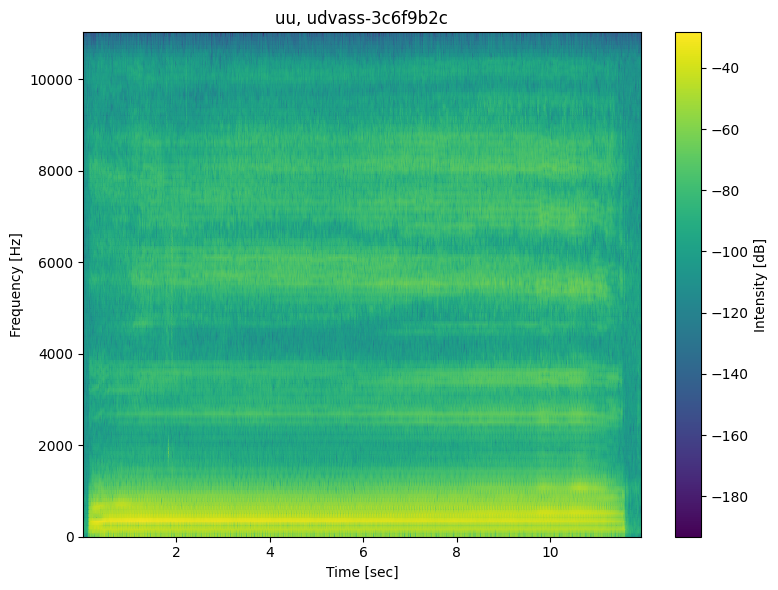

In [123]:
asq_datafolds.viz_random_chunk()


#### TESTS

In [82]:
asq_datafolds.SUBJECT_DFS.items()

dict_items([('bhargavee-70c0073e',               app_code              sub_id file_class  file_xindex  score  \
0   webapp-asquire-mox  bhargavee-70c0073e         oo            8    4.0   
1   webapp-asquire-mox  bhargavee-70c0073e         oo            8    4.0   
2   webapp-asquire-mox  bhargavee-70c0073e         oo            8    4.0   
3   webapp-asquire-mox  bhargavee-70c0073e        yee            9    3.0   
4   webapp-asquire-mox  bhargavee-70c0073e        yee            9    3.0   
5   webapp-asquire-mox  bhargavee-70c0073e        yee            9    3.0   
6   webapp-asquire-mox  bhargavee-70c0073e      cough           10    0.0   
7   webapp-asquire-mox  bhargavee-70c0073e      cough           10    0.0   
8   webapp-asquire-mox  bhargavee-70c0073e      cough           10    0.0   
9   webapp-asquire-mox  bhargavee-70c0073e         ss           11    2.0   
10  webapp-asquire-mox  bhargavee-70c0073e         ss           11    2.0   
11  webapp-asquire-mox  bhargavee-70c0073